In [2]:
from utilities import make_network,cavity_trj
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, "../../lib")  # add the library folder to the path I look for modules
import latexify

In [3]:
N = 200_000
gamma = 1.81
bias = 0.379
J = make_network(N,gamma,bias)


In [4]:
js = J.transpose().tolil().rows  # list of list, structure is [el[i]] where el[i]
Ks = np.array([len(neigh) for neigh in js])  # in degree of each gene
avg_degree = np.mean(Ks)

In [5]:
T = 0.3*np.sqrt(avg_degree)
theta = 0
P,trj = cavity_trj(J,T,theta)

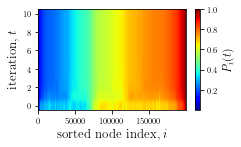

In [7]:
latexify.latexify(columns = 2)
plt.imshow(np.array(trj)[:,np.argsort(P)],aspect='auto', origin='lower',cmap ='jet')
cbar = plt.colorbar()
cbar.set_label("$P_i(t)$",rotation=90,fontsize=12)
plt.ylabel('iteration, $t$',fontsize=13)
plt.xlabel('sorted node index, $i$',fontsize=13)
plt.tight_layout()
#plt.savefig('figures/trajectory.pdf')